# Week 4 Coding Exercises

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from utils import display_image
from utils import display_images
from utils import matplotlib_show_images

1. Create a **random noise color and grayscale** image. You can set your own width and height, but keep the total number of pixels of both images identical.

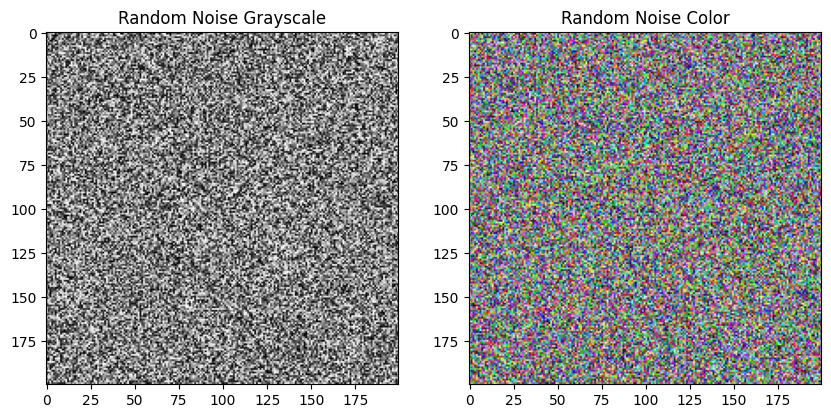

In [2]:
# Question 1

# Define width and height
width, height = 200, 200

# Create a random noise grayscale
grayscale_image = np.random.randint(0, 256, (height, width), dtype="uint8")

# Create a random noise color
color_image = np.random.randint(0, 256, (height, width,3), dtype="uint8")

matplotlib_show_images([grayscale_image, color_image], nrow=1, ncol=2, titles=["Random Noise Grayscale", "Random Noise Color"], axes=True)

2. Convert the code chunk found under section <a href="#Section1">Divide an image into smaller patches using cropping</a> into a function with the following signature:
```python
crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)
 # img is the source image
 # num_horizontal_grid and num_vertical_grid are the number of patches along x and y axes.
 # line_color is the color of the grid line.
 # The output of the function should be image with grids
```

In [3]:
def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
    """
    Function to divide an image into smaller patches using cropping and draw grid.
    
    Arguments:
    ---
    img: source image (NumPy array)
    num_horizontal_grid: number of patches along x-axis (integer)
    num_vertical_grid: number of patches along y-axis (integer)
    line_color: color of the grid line (tuple of BGR values)
    
    Return:
    ---
    img_copy: image with grid (NumPy array)
    """
    
    img_copy = img.copy()
    
    # Get the dimensions of the image
    height, width = img.shape[:2]
    
    # Calculate the size of each patch
    M, N = height // num_vertical_grid, width // num_horizontal_grid
    
    for y in range(0, height, M):
        for x in range(0, width, N):
            x1 = x + N
            y1 = y + M

            if x1>=width and y1>=height:
                x1 = width - 1
                y1 = height - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), (0,255,0),1)

            elif x1>=width:
                x1 = width - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), (0,255,0),1)

            else: 
                cv.rectangle(img_copy, (x, y), (x1, y1), (0,255,0),1)
        
    return img_copy

In [10]:
img = cv.imread('images/dog.jfif')

# Define the number of patches and the grid line color (BGR)
num_horizontal_grid = 3
num_vertical_grid = 2
line_color = (0, 255, 0)  # Green color

img_with_grid = crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)
cv.imshow('patch', img_with_grid)
cv.waitKey(0)
cv.destroyAllWindows()

3. How would you *change the brightness* of a **color image**? Suggest **two ways** to perform the image processing operations. Implement your methods by providing the example codes. You are free to choose any image.

In [5]:
# Question 3
# HSL
img = cv.imread("images/car.jpg")
# change BGR to HSL
img_hsl = cv.cvtColor(img, cv.COLOR_BGR2HLS)
# split channels
h, l, s = cv.split(img_hsl)
# change L channel to [0-255]
new_lightness = 200
l_new = np.zeros_like(l) + new_lightness
l_new = np.uint8(l_new)

# merge channels
transform = cv.merge((h, l_new, s))
transform_display = cv.cvtColor(transform, cv.COLOR_HLS2BGR)

display_images([img, transform_display], ("original", f"lightness = {new_lightness}"))

In [11]:
# CIELAB
img = cv.imread("images/car.jpg")
# change BGR to CIELAB
img_lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
# split channels
l, a, b = cv.split(img_lab)
# change L channel to [0-255]
new_lightness = 255
l_new = np.zeros_like(l) + new_lightness
l_new = np.uint8(l_new)

# merge channels
transform = cv.merge((l_new, a, b))
transform_display = cv.cvtColor(transform, cv.COLOR_LAB2BGR)

display_images([img, transform_display], ("original", f"lightness = {new_lightness}"))

4. Provide at least one common use case(s) for the following color spaces:
    - RGB
    - HSV
    - CIELAB

In [7]:
# Question 4
# RGB => To read and display images
img = cv.imread('images/car.jpg')

# Convert BGR (OpenCV default) to RGB (for display using Matplotlib)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
display_image("car", img_rgb)

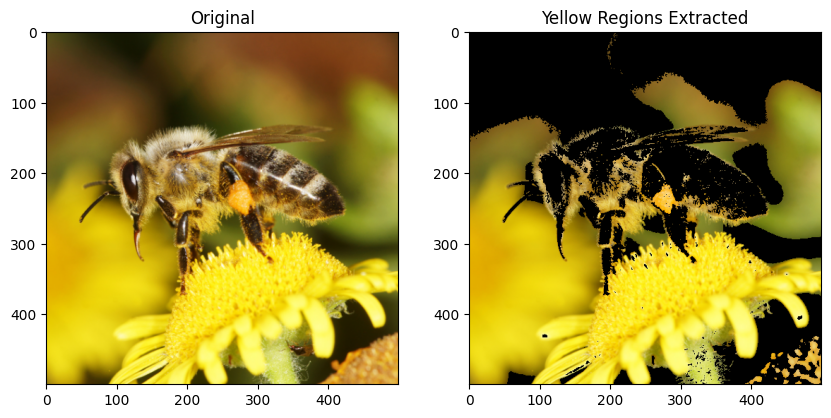

In [8]:
# HSV => To detect specific color in an image, such as yellow color, and extract for color-based image segmentation
img = cv.imread('images/native-bee.png')

# Convert BGR to HSV
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Define the range for the yellow color in HSV (Hue: 20-40, Saturation: 100-255, Value: 100-255)
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([40, 255, 255])

# Create a mask to extract yellow regions
mask_yellow = cv.inRange(img_hsv, lower_yellow, upper_yellow)

# Apply the mask to the original BGR image to get the yellow regions
transform_display = cv.bitwise_and(img, img, mask=mask_yellow)

img_show = cv.cvtColor(img, cv.COLOR_BGR2RGB)
transform_display_show = cv.cvtColor(transform_display, cv.COLOR_BGR2RGB)

matplotlib_show_images([img_show, transform_display_show], nrow=1, ncol=2, titles=["Original", "Yellow Regions Extracted"], axes=True)

In [12]:
# CIELAB => Visualize color difference between two colors to highlight and extract regions 
# of the image that have a specific color or color differ from a reference color
img = cv.imread('images/car.jpg')

# Convert BGR to LAB
img_lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)

# Define a reference color in LAB
reference_color = np.array([50, 0, 0], dtype=np.uint8)  # gray color in LAB

# Create a reference image with the reference color
reference_img = np.full_like(img_lab, reference_color)

# Calculate the Euclidean distance in LAB color space
color_diff = np.linalg.norm(img_lab - reference_img, axis=2)

# Normalize the color difference to the range [0, 255]
color_diff_normalized = cv.normalize(color_diff, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)

# Convert the single-channel normalized color difference to 3 channels
color_diff_normalized_rgb = cv.cvtColor(color_diff_normalized, cv.COLOR_GRAY2BGR)

display_images([img, color_diff_normalized_rgb], ("Original", "Color Difference"))